In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
# %pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import shap
shap.initjs()


# Loading data and splitting

In [14]:
data = pd.read_csv('D:\data science project\data\dataset.csv')

data_filtered=data.drop(columns=['record','subject'],axis=1)

data_filtered['vowel'] = data_filtered['vowel'].map({'a':0,'i':1})
data_filtered['group1'] = data_filtered['group'].map({'PSP':'parkinsonism','MSA':'parkinsonism','HC':'HC','PD':'PD'})

In [15]:
X = data_filtered.drop(columns=['group','group1'],axis=1)
y = data_filtered['group1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random forest

In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.6176470588235294


In [17]:
cr= classification_report(y_test, y_pred)
print(cr)

y_train_xg = y_train.map({'parkinsonism':1,'HC':0,'PD':2})
y_test_xg = y_test.map({'parkinsonism':1,'HC':0,'PD':2})

              precision    recall  f1-score   support

          HC       0.69      0.55      0.61        20
          PD       0.46      0.33      0.39        18
parkinsonism       0.64      0.83      0.72        30

    accuracy                           0.62        68
   macro avg       0.60      0.57      0.57        68
weighted avg       0.61      0.62      0.60        68



# XG Boost

In [18]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train_xg)
y_pred_xg = xgb.predict(X_test)

acc = accuracy_score(y_test_xg, y_pred_xg)
print(f'Accuracy: {acc}')

cr= classification_report(y_test_xg, y_pred_xg)
print(cr)

Accuracy: 0.6176470588235294
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.65      0.73      0.69        30
           2       0.44      0.39      0.41        18

    accuracy                           0.62        68
   macro avg       0.60      0.59      0.59        68
weighted avg       0.61      0.62      0.61        68



# Explanations
## Random forest

LIME and SHAP explanations

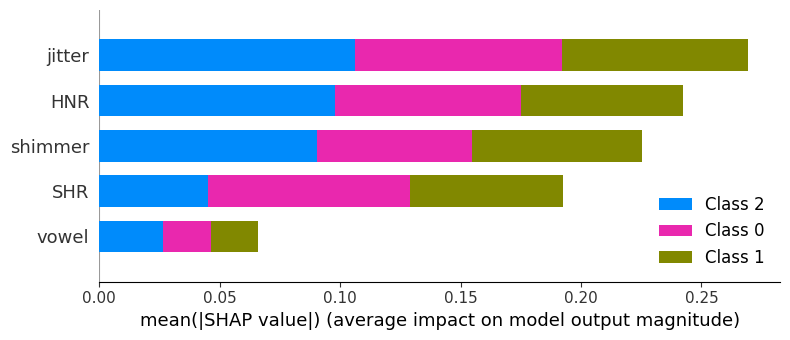

In [63]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

## XG Boost

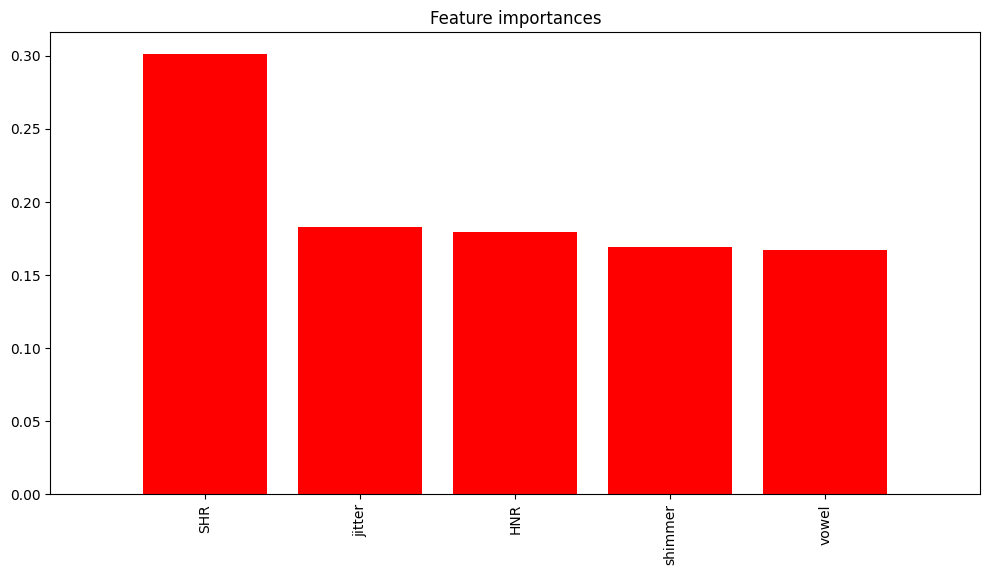

<Figure size 1200x600 with 0 Axes>

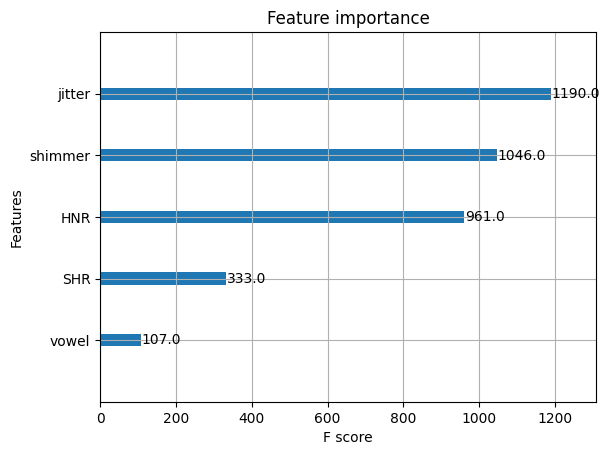

<Figure size 1200x600 with 0 Axes>

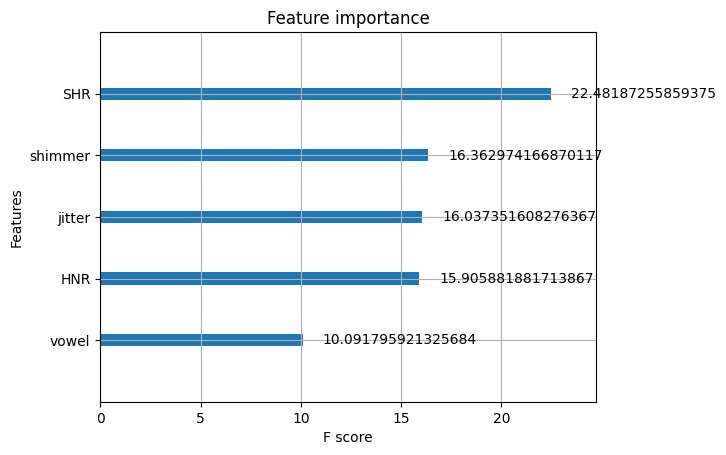

In [ ]:
# based on gain/purity of splits
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# plot of feature importance based on weight
plt.figure(figsize=(12,6))
plot_importance(xgb)
plt.show()

plt.figure(figsize=(12,6))
plot_importance(xgb, importance_type="cover") # i think this one makes more sense, but to be determined
plt.show()


# Conclusions
- Both models consider jitter, shimmer very important, they are usually the top 3 predictors
- Explanations for XGB change with the type of importance (Weight-based, Cover, Gain importance)
- these are non extensive conclusions

In [57]:
# we can add lime if we are interested in local explanations

# Scrapped
but might need at some point

<Figure size 640x480 with 0 Axes>

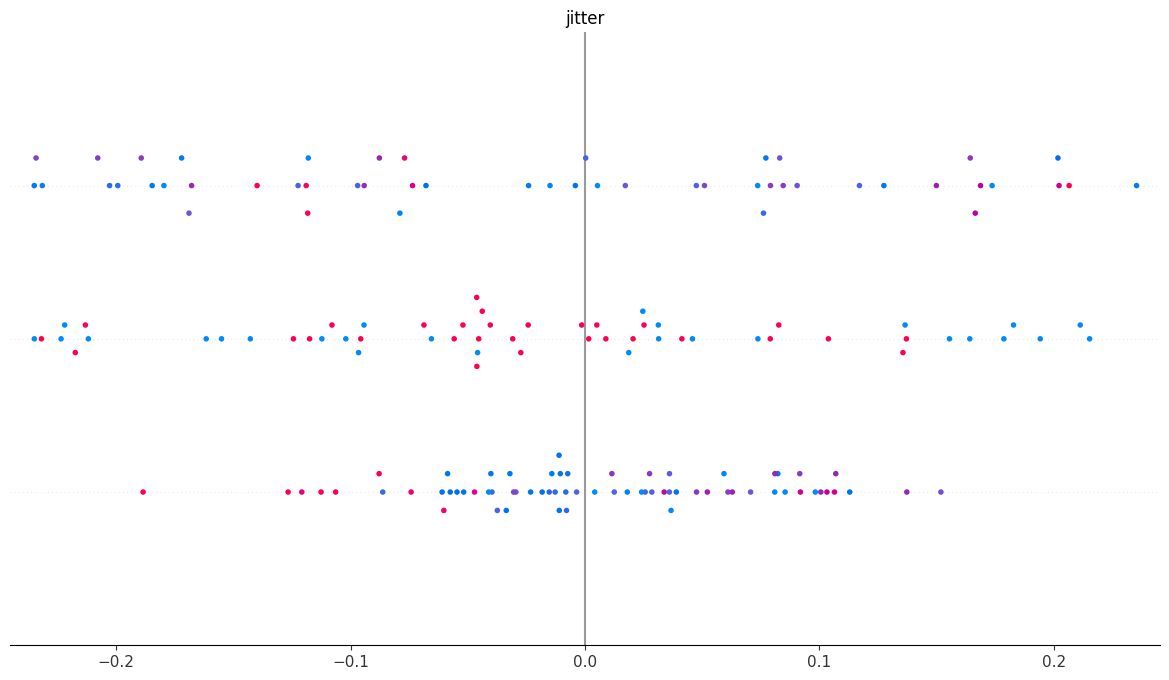

In [54]:

# rf_explainer = shap.TreeExplainer(rf)
# rf_shap_values = rf_explainer.shap_values(X_test)
# shap.summary_plot(rf_shap_values, X_test, title="RF SHAP Summary")
# rf_explainer = shap.TreeExplainer(rf)
# rf_shap_values = rf_explainer.shap_values(X_test)
# shap.summary_plot(rf_shap_values, X_test, title="RF SHAP Summary for Class 1")

# SHAP explainer for XGBoost
# xgb_explainer = shap.TreeExplainer(xgb)
# xgb_shap_values = xgb_explainer.shap_values(X_test)
# shap.summary_plot(xgb_shap_values, X_test, title="XGBoost SHAP Summary")
# shap.dependence_plot("your_feature_name", rf_shap_values, X_test)
# shap.dependence_plot("your_feature_name", xgb_shap_values, X_test)
# shap.initjs()
# shap.force_plot(rf_explainer.expected_value[1], rf_shap_values[1][0], X_test.iloc[0])
# shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[0], X_test.iloc[0])
